# ĐỀ THI GIỮA KÌ 
## Môn: Tối ưu hoá cho Khoa học dữ liệu
## Ngày: 28/10/2023
## Lớp: DHKHDL17A. Thời gian: 90 phút

### Câu 1 (3 điểm)

Một cơ sở sản xuất đồ gỗ dự định sản xuất ba loại sản phẩm là bàn,
ghế và tủ. Định mức sử dụng lao động, chi phí sản xuất và giá bán mỗi sản phẩm mỗi loại ước tính trong bảng sau:

| Các yếu tố   |  Bàn |  Ghế | Tủ |
|---|---|---|---|
| Lao động (ngày công)   |  2 | 1  | 3  |
| Chi phí sản xuất (ngàn đồng)   | 100 | 40  | 250  |
| Giá bán (ngàn đồng)   | 260  | 120  |  600 |

Bài toán đặt ra là xác định số sản phẩm mỗi loại cần phải sản xuất sao cho không bị động trong sản xuất và tổng doanh thu đạt được cao nhất, biết rằng cơ sở có số lao động tương đương với 500 ngày công, số tiền dành cho chi phí sản xuất là 40 triệu đồng và số bàn, ghế phải theo tỉ lệ 1/6.

1.  Hãy lập mô hình tối ưu của bài toán trên theo dạng dưới đây bằng cách chỉ ra $f_0, A, b$ và $h$.
    
\begin{align}
\text{minimize}\quad & f_0(x),\\
\text{subject to}\quad & Ax\leq b,\\
& h(x)=0.
\end{align}


3.  Sử dụng `scipy.optimize.linprog` để giải bài toán trên.


4.  Sử dụng `cvxpy` để giải bài toán trên.

*Lưu ý: Chấp nhận số lượng bàn ghế là số thực.*

Bài toán mẫu
Giả sử chúng ta có bài toán tối ưu hóa tuyến tính sau:

Hàm mục tiêu: Minimize 
\begin{align}
f_0 (x) = -260x_1 - 120x_2 -600x_3
\end{align}
**(Chúng ta sử dụng dấu trừ vì linprog trong scipy chỉ hỗ trợ tối thiểu hóa.)**
x- _2 \leq -4 )
( x_2 \geq -số)+ 
Bước 1: Xác định các tham số
Hệ s+ ố hàm mục tiêu: ( c = [-1, 4] )
Ma trận ràng b+ uộc: ( A = [[3, -1], [-1, -2]] )
+ Vector ràng buộc: ( b = [6, -4] )
Giới hạn biến: ( x_1 ) không giới hạn, ( x_2 \geq -3 )_2 \geq -3 )

\section*{Mô hình tối ưu}

Giả sử số lượng bàn, ghế và tủ cần sản xuất lần lượt là \(x_1\), \(x_2\) và \(x_3\).

\subsection*{Hàm mục tiêu}
Chúng ta cần tối đa hóa tổng doanh thu:
\[
f_0(x) = - (260x_1 + 120x_2 + 600x_3)
\]
(Chúng ta sử dụng dấu trừ vì \texttt{scipy.optimize.linprog} chỉ hỗ trợ hàm mục tiêu dạng tối thiểu hóa.)

\subsection*{Ràng buộc}

1. **Ràng buộc về lao động:**
    \[
    2x_1 + x_2 + 3x_3 \leq 500
    \]

2. **Ràng buộc về chi phí sản xuất:**
    \[
    100x_1 + 40x_2 + 250x_3 \leq 40000
    \]

3. **Ràng buộc về tỉ lệ bàn và ghế:**
    \[
    x_1 = \frac{1}{6}x_2
    \]

4. **Ràng buộc không âm:**
    \[
    x_1 \geq 0, \quad x_2 \geq 0, \quad x_3 \geq 0
    \]

\subsection*{Mô hình toán học}

\begin{align}
\text{minimize} \quad & - (260x_1 + 120x_2 + 600x_3), \\
\text{subject to} \quad & 2x_1 + x_2 + 3x_3 \leq 500, \\
& 100x_1 + 40x_2 + 250x_3 \leq 40000, \\
& x_1 - \frac{1}{6}x_2 = 0, \\
& x_1 \geq 0, \quad x_2 \geq 0, \quad x_3 \geq 0.
\end{align}
ad x_3 \geq 0.
\end{align}

\end{document}


### 2) Sử dụng scipy.optimize

In [1]:
from scipy.optimize import linprog

# Hệ số cho hàm mục tiêu (tối đa hóa doanh thu, nên ta tối thiểu hóa nghịch đảo của nó)
# Do x2 = 6 * x1, hệ số cho x1 được điều chỉnh tương ứng
c = [-260, - 120, -600]  # Hệ số cho x1 và x3

# Hệ số cho các ràng buộc bất đẳng thức (ma trận A và vector b)
# Ràng buộc lao động: 8*x1 + 3*x3 <= 500
# Ràng buộc chi phí: 340*x1 + 250*x3 <= 40000
A = [
    [2, 1, 3],       # Ràng buộc về lao động
    [100, 40, 250]    # Ràng buộc về chi phí sản xuất
]

# Véc tơ b đại diện cho các giới hạn bên phải của ràng buộc bất đẳng thức
b = [500, 40000]

# Giới hạn cho x1 và x3 (số lượng sản phẩm không âm)
x_bounds = (0, None)

# Giải bài toán lập trình tuyến tính cho bài toán rút gọn
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, x_bounds], method='highs')

# Lấy giá trị của x1 (số lượng bàn) và x3 (số lượng tủ)
x1 = result.x[0]  # số lượng bàn
x3 = result.x[1]  # số lượng tủ
x2 = 6 * x1       # số lượng ghế (vì x2 = 6 * x1)

# Tính tổng doanh thu
total_revenue = -(result.fun)

# Hiển thị kết quả
x1, x2, x3, total_revenue

(5.102040816326523, 30.61224489795914, 153.06122448979593, 96836.73469387754)

In [5]:
from scipy.optimize import linprog

# Hệ số hàm mục tiêu
c = [-1, 4]

# Ma trận và vector ràng buộc
A = [[3, -1], [-1, -2]]
b = [6, -4]

# Giới hạn biến
x0_bounds = (None, None)
x1_bounds = (-3, None)

# Giải bài toán
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])

# Kết quả
print("Giá trị tối ưu:", res.fun)
print("Giá trị của các biến:", res.x)

Giá trị tối ưu: 1.1428571428571415
Giá trị của các biến: [2.28571429 0.85714286]


### 3) Sử dụng cvxpy 

In [2]:
import cvxpy as cp

# Khai báo biến quyết định
x1 = cp.Variable(nonneg=True)  # số lượng bàn (không âm)
x3 = cp.Variable(nonneg=True)  # số lượng tủ (không âm)
x2 = 6 * x1  # số lượng ghế, đã biết tỷ lệ x2 = 6 * x1

# Hàm mục tiêu (tối đa hóa doanh thu, tức là tối thiểu hóa nghịch đảo của nó)
objective = cp.Maximize(260 * x1 + 120 * x2 + 600 * x3)

# Ràng buộc:
constraints = [
    8 * x1 + 3 * x3 <= 500,      # Ràng buộc về lao động
    340 * x1 + 250 * x3 <= 40000 # Ràng buộc về chi phí sản xuất
]

# Xây dựng bài toán
problem = cp.Problem(objective, constraints)

# Giải bài toán
problem.solve()

# Lấy giá trị kết quả
x1_value = x1.value
x3_value = x3.value
x2_value = 6 * x1_value  # Số lượng ghế
total_revenue = 260 * x1_value + 120 * x2_value + 600 * x3_value

# In kết quả
print(f"Số lượng bàn: {x1_value:.2f}")
print(f"Số lượng ghế: {x2_value:.2f}")
print(f"Số lượng tủ: {x3_value:.2f}")
print(f"Tổng doanh thu: {total_revenue:.2f} ngàn đồng")

Số lượng bàn: 5.10
Số lượng ghế: 30.61
Số lượng tủ: 153.06
Tổng doanh thu: 96836.73 ngàn đồng


### Câu 2 (4 điểm)

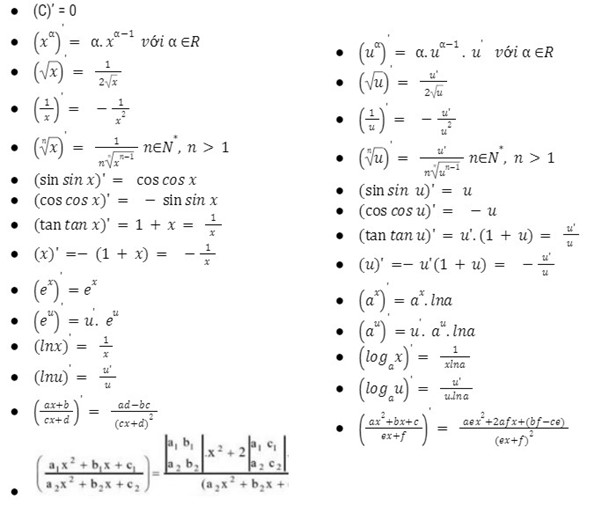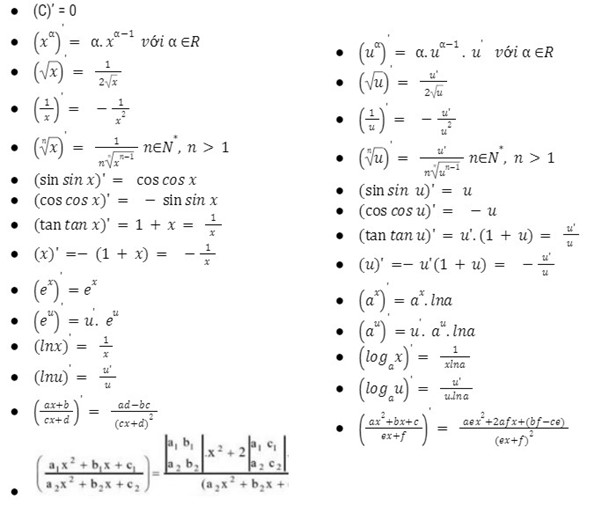

1. Cho một hàm số mục tiêu $f(x)=x^2+\sin \left(\dfrac{x}{2}\right)+2023x.$
Hãy tính đạo hàm của hàm số này.


2. Sử dụng thuật toán Gradient Descent, hãy tìm giá trị của $x$ để tối ưu hóa hàm số $f(x)=x^2+\sin \left(\dfrac{x}{2}\right)+2023x,$ với giá trị $x$ ban đầu là $x^{(0)}=2024$, sử dụng learning rate là $0.9$ và thực hiện tối đa $100$ vòng lặp. In ra giá trị của $x$ và $f(x)$ tương ứng sau mỗi vòng lặp.


3. Bằng cách thay đổi giá trị learning rate trong thuật toán trên, hãy giải thích sự quan trọng của việc điều chỉnh tham số learning rate trong thuật toán Gradient Descent và cách lựa chọn giá trị tối ưu của nó.


4. Hãy trình bày một ví dụ cụ thể về một vấn đề thực tế trong học máy hoặc khoa học dữ liệu mà Gradient Descent có thể được sử dụng để giải quyết.

Code mẫu (câu 2.1, 2.2):

In [17]:
import sympy as sp

# Khai báo biến
x = sp.symbols('x')
x_2 = sp.symbols('x_2')
# Định nghĩa hàm 

f = 2 * sp.exp(2 * x) + (x - 2)

# Tìm đạo hàm của hàm số
f_prime = sp.diff(f, x)

print("Sau khi đạo hàm: ", f_prime)

Sau khi đạo hàm:  4*exp(2*x) + 1


### Câu 1, 2:

In [17]:
import numpy as np
import sympy as sp

# 1. Tính đạo hàm của hàm số f(x)
x = sp.symbols('x')
f = x**2 + sp.sin(x/2) + 2023*x
f_prime = sp.diff(f, x)
print(f"Đạo hàm của hàm số f(x): {f_prime}")

# 2. Sử dụng thuật toán Gradient Descent để tối ưu hóa hàm số f(x)
def objective_function(x):
    return x**2 + np.sin(x/2) + 2023*x

def gradient(x):
    return 2*x + 0.5*np.cos(x/2) + 2023

def gradient_descent(learning_rate, max_iterations, initial_x):
    x = initial_x
    for i in range(max_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        print(f"Vòng lặp {i+1}: x = {x}, f(x) = {objective_function(x)}")
    return x

learning_rate = 0.9
max_iterations = 100
initial_x = 2024

final_x = gradient_descent(learning_rate, max_iterations, initial_x)
print("Giá trị x cuối cùng sau Gradient Descent:", final_x)
print("Giá trị f(x) tương ứng:", objective_function(final_x))

Đạo hàm của hàm số f(x): 2*x + cos(x/2)/2 + 2023
Vòng lặp 1: x = -3440.31321113998, f(x) = 4876002.355559468
Vòng lặp 2: x = 931.4901692736894, f(x) = 2752079.257805251
Vòng lặp 3: x = -2566.2090665245314, f(x) = 1393987.059267939
Vòng lặp 4: x = 232.162007539132, f(x) = 523563.096265053
Vòng lặp 5: x = -2005.9852059053846, f(x) = -34130.69099537283
Vòng lặp 6: x = -215.60633475570125, f(x) = -389686.3591102944
Vòng lặp 7: x = -1648.4622122708645, f(x) = -617412.2961790441
Vòng lặp 8: x = -502.12066657322, f(x) = -763664.6807625607
Vòng lặp 9: x = -1419.437512399157, f(x) = -856718.9584847123
Vòng lặp 10: x = -685.5823175434986, f(x) = -916909.5642730244
Vòng lặp 11: x = -1271.812606777561, f(x) = -955370.5615278275
Vòng lặp 12: x = -803.368298704932, f(x) = -979813.0192386736
Vòng lặp 13: x = -1178.41255479367, f(x) = -995271.4614540564
Vòng lặp 14: x = -878.040607323064, f(x) = -1005320.1212940649
Vòng lặp 15: x = -1118.580169839656, f(x) = -1011666.1737115162
Vòng lặp 16: x = -926.2

In [11]:
import numpy as np

# Hàm số mục tiêu
def objective_function(x):

    return None

# Đạo hàm của hàm số mục tiêu
def gradient(x):

    return None

def gradient_descent(learning_rate, max_iterations, initial_x):

    return None

learning_rate = 0.9
max_iterations = 100
initial_x = 2024

final_x = gradient_descent(learning_rate, max_iterations, initial_x)
print("Giá trị x cuối cùng sau Gradient Descent:", final_x)
print("Giá trị f(x) tương ứng:", objective_function(final_x))

Giá trị x cuối cùng sau Gradient Descent: None
Giá trị f(x) tương ứng: None


### Câu 3:

**Learning rate (tốc độ học)** là một tham số quan trọng trong thuật toán Gradient Descent, quyết định kích thước của bước di chuyển trong không gian tham số để tìm cực tiểu của hàm mục tiêu. Việc lựa chọn giá trị learning rate phù hợp là rất quan trọng vì:

+ **L
Learning rate quá lớ**n: Nếu learning rate quá lớn, thuật toán có thể bỏ qua điểm cực tiểu và dao động xung quanh nó hoặc thậm chí phân kỳ, dẫn đến việc không hội t
 
+ **.
Learning rate quá n**hỏ: Nếu learning rate quá nhỏ, thuật toán sẽ tiến rất chậm và cần nhiều vòng lặp để hội tụ, làm tăng thời gian tính toán.

Câu 1 (3 điểm) Một công ty điện tử sản xuất hai kiểu radio trên hai dây chuyền độc lập. Radio kiểu một sản xuất trên dây chuyền một với công suất 45 radio/ngày, radio kiểu hai sản xuất trên dây chuyền hai với công suất 80 radio/ngày. Để sản xuất một chiếc radio kiểu một cần 12 linh kiện, để sản xuất một chiếc radio kiểu hai cần 9 linh kiện. Tiền lãi khi bán một chiếc radio kiểu một là 250000 đồng, lãi thu được khi bán một chiếc radio kiểu hai là 180000 đồng. Biết rằng số linh kiện có thể sử dụng tối đa trong một ngày là 900. Bài toán đặt ra là xác định lợi nhuận có thể thu được lớn nhất của công ty là bao nhiêu. 
a
) (1 điểm) Hãy lập mô hình tối ưu của bài toán trên theo dạng dưới đây, bằng cách chỉ ra hàm mục tiêu fo, ma trận A và vector b
minimize fo(x),
subject to Ax < b.b20) (2 điểm) Sử dụng thư viện thích hợp để giải bài toán trê.
.

Câu 2: Cho ma trận A = [(1,0),(0,-2)] và vector b = (2;4). Xét bài toán tối ưu sau:

min_{x=(x_1,x_2) thuộc R^2} f(x) = e^(2*x_1) + (frac{1}{2}) *||Ax -b||^2_2

a) (2 điểm) Xác định điểm tối ưu x^* và giá trị tối ưu p^* của bài toán (1).
b) (2 điểm) Sử dụng thuật toán Gradient Descent, với giá trị x ban đầu là x^(0)=(-3; 5) sử dụng learning rate lần lượt là 2/5 và 1/2 và thực hiện tối đa 100 vòng lặp. In ra giá trị của x^(k), f(x^(k)) tương ứng sau mỗi vòng lặp k và vẽ đồ thị biểu thị cho sai số 
|f(x^(k)) -p^* | trong hai trường hợp của learning rate. Hãy đưa ra kết luận về sự hội tụ của thuật toán Gradient Descent trong từng trường hợp của learning rate.

Câu 3 (3 điểm, CLO 1, 2) Cho các vector c, a_1, a_2,..., a_m ∈ R và các số b_1, b_2,..., b_m ∈ R (m € Z^+). Xéết bài toán tối ưu sa

min_{x thuộc R^n} f(x) = (c^T)*x - sum_{i=1}^{m} \log\left(b_i - (a_i^T)x\right)    (2)

Tính delta f, delat^2 f và chứng minh rằng f là hàm lồi trên tập xác định của nó.
Cho m = 4 n = 3 và ma trận Athuộc  _{33x}4(R) được xác định như sa:

A = [(0 -2 -1 -2), (-1 1 -3 0), 1 -1 2 -5)]

Gọi a_i là cột thứ i của A(i = 1,2,3,4), b = (3, -1, 3, 2) và c =(4, 11/4, 13/4)
Xác định điểm tối ưu x^* và giá trị tối ưu p^* của bài toán (2).
Với dữ kiện được cho ở ý b), sử dụng thuật toán Gradient Descent cho bài toán (2) với learning rate = 0.1. Tính theo phương pháp exact line search và điểm khởi tạo x^(0) = (-1, 1, 0), vẽ đồ thị biểu thị cho sai số err_k =|f(x^(k)) - p^*|. Từ đó anh chị rút ra được kết luận gì?uu

In [18]:
import numpy as np

# Hàm số mục tiêu (hàm mất mát)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot(predictions - y))
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

# Dữ liệu mẫu
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

# Thêm cột 1 vào X để tính toán theta_0
X_b = np.c_[np.ones((100,1)), X]

# Khởi tạo tham số
theta = np.random.randn(2,1)

# Thực hiện Gradient Descent
learning_rate = 0.1
iterations = 1000
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

print("Theta tối ưu:", theta)
print("Giá trị hàm mất mát cuối cùng:", cost_history[-1])

Theta tối ưu: [[3.97785934]
 [2.98938367]]
Giá trị hàm mất mát cuối cùng: 5366.643737103032


### Câu 3 (3 điểm)

Gọi $\gamma=\overline{\gamma_1\gamma_2\gamma_3\gamma_4\gamma_5\gamma_6\gamma_7\gamma_8}$ là mã số sinh viên của anh/chị. Đặt $\alpha=\gamma_7$ và $\beta=\sum_{i=1}^8\gamma_i$, xét bài toán tối ưu sau
\begin{align}
\min_{x=(x_1,x_2)\in \mathbb{R}^2} f(x)=\dfrac{1}{2}x_1^2+\dfrac{1}{2}x_2^2+(\alpha+1) x_2-\beta\quad (1)
\end{align}

1. Hãy tìm $\alpha,\beta$ và giá trị tối ưu $p^*$ của bài toán (1).

2. Sử dụng thuật toán Gradient Descent cho bài toán (1) với learning rate là $\dfrac{1}{\alpha+1}$ và điểm khởi tạo $x^{(0)}=(1,0)$, hãy tìm công thức cho điểm cập nhật $x^{(k)}$. 

3. Gọi $x^*$ là điểm tối ưu của (1), hãy vẽ đồ thị biểu thị cho sai số $\text{err}_k=\|\nabla f(x^*)-\nabla f(x^{(k)})\|_2^2$. Từ đó anh/chị rút ra được kết luận gì?

4. Hãy tìm learning rate trong thuật toán Gradient Descent của bài toán (1) theo phương pháp exact line search. Từ đó rút ra nhận xét cho các điểm cập nhật $x^{(k)}$.

## ------------------------------------------------ Hết -----------------------------------------------

### Lưu ý: sinh viên không được sử dụng internet. Giám thị không giải thích gì thêm.